In [1]:
import re
from itertools import count

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx


from datasets import Dataset

In [ ]:
from datasets import load_from_disk

In [1]:
from datasets import load_dataset

In [2]:
from huggingface_hub import login
login()
test = load_dataset("causality-grammar/logic_explanations", data_files={
    "test": "deepseek_2k_RP_test.parquet"
})   

In [4]:
test["test"][3]

{'Question': 'Facts:  Batman is inexpensive [PERIOD] Batman is dull [PERIOD] Batman is spotless [PERIOD] Batman is blushing [PERIOD] Batman is disgusted [PERIOD]\nRules:\nugly [AND] intellectual [IMPLY] spotless [PERIOD]\nattentive [AND] frantic [IMPLY] cooperative [PERIOD]\nelegant [AND] condemned [AND] amused [IMPLY] strange [PERIOD]\nblushing [AND] condemned [AND] silly [IMPLY] clumsy [PERIOD]\nfancy [AND] silly [AND] clumsy [IMPLY] blushing [PERIOD]\nmessy [IMPLY] supportive [PERIOD]\namused [AND] disgusted [AND] silly [IMPLY] messy [PERIOD]\nanxious [AND] dull [IMPLY] popular [PERIOD]\nanxious [AND] spotless [AND] disgusted [IMPLY] attentive [PERIOD]\ncooperative [IMPLY] blushing [PERIOD]\nshiny [AND] intellectual [IMPLY] messy [PERIOD]\nfrantic [AND] inexpensive [IMPLY] bossy [PERIOD]\nugly [IMPLY] cooperative [PERIOD]\nelegant [AND] messy [AND] bossy [IMPLY] attentive [PERIOD]\nfrantic [AND] strange [AND] cooperative [IMPLY] disgusted [PERIOD]\nspotless [IMPLY] frail [PERIOD]\ns

In [21]:
for sample in test["test"].select(range(10)):
    print(sample['Depth'])

6
0
4
5
8
0
8
1
9
1


In [4]:
deepseek = load_dataset("parquet", data_files={
    "test": "./data/deepseek_2k_RP_test.parquet",
})

Generating test split: 0 examples [00:00, ? examples/s]

In [10]:
depths = [0 for _ in range(12)]
for sample in deepseek['test']:
    depths[sample['Depth']] += 1

In [11]:
print(depths)

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]


In [23]:
deepseek = load_dataset("parquet", data_files={
    "train": "./data/deepseek_5k_RP.parquet",
})

Generating train split: 0 examples [00:00, ? examples/s]

In [30]:
mistral = load_dataset("parquet", data_files={
    "train": "./data/mistral_5k_RP.parquet",
})

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
i = 9000
print('Question')
print(deepseek[i]['Question'])
print('\nComplex_CoT')
print(deepseek[i]['Complex_CoT'])
print('\nResponse (LABEL)')
print(deepseek[i]['Response'])
print('\nDepth')
print(deepseek[i]['Depth'])

Question
Facts:  Alice is loving [PERIOD] Alice is agreeable [PERIOD]
Rules:
hypocritical [AND] agreeable [AND] muddy [AND]  [IMPLY] loving [PERIOD]
agreeable [AND] loving [AND]  [IMPLY] hypocritical [PERIOD]
hypocritical [AND] friendly [AND]  [IMPLY] loving [PERIOD]
hypocritical [AND] agreeable [AND]  [IMPLY] loving [PERIOD]
friendly [AND] hypocritical [AND] muddy [AND]  [IMPLY] agreeable [PERIOD]
loving [IMPLY] hypocritical [PERIOD]
hypocritical [IMPLY] agreeable [PERIOD]
muddy [IMPLY] agreeable [PERIOD]
muddy [AND] agreeable [AND] hypocritical [AND]  [IMPLY] friendly [PERIOD]
friendly [AND] hypocritical [AND] agreeable [AND]  [IMPLY] loving [PERIOD]
Query: Alice is friendly [PERIOD]

Complex_CoT
Proof chain:
   agreeable ∧ loving ⇒ hypocritical
   Cannot apply rule “muddy ∧ agreeable ∧ hypocritical ⇒ friendly” because missing: muddy.


Response (LABEL)
0

Depth
2


In [7]:
print(mistral[8765].keys())
print(mistral[8765]['depth'])

dict_keys(['prompt', 'depth', 'messages'])
0


In [21]:
i = 34700

print(mistral[i]['prompt'])
print('\nContent (User)')
print(mistral[i]['messages'][0])
print('\nContent (Assistant)')
print(mistral[i]['messages'][1])
print('\nDepth')
print(mistral[i]['depth'])

Facts: 
Rules:
fearless [AND] agreeable [AND] alert [AND]  [IMPLY] friendly [PERIOD]
sincere [AND] tame [AND]  [IMPLY] confident [PERIOD]
fearless [IMPLY] tame [PERIOD]
attractive [IMPLY] outstanding [PERIOD]
friendly [AND] crowded [AND] fearless [AND]  [IMPLY] average [PERIOD]
confident [AND] attractive [AND]  [IMPLY] fearless [PERIOD]
frantic [AND] thoughtful [AND] alert [AND]  [IMPLY] tame [PERIOD]
friendly [AND] ambitious [AND] crowded [AND]  [IMPLY] frantic [PERIOD]
agreeable [AND] thoughtful [AND] sincere [AND]  [IMPLY] outstanding [PERIOD]
tame [AND] fearless [AND]  [IMPLY] alert [PERIOD]
average [IMPLY] ambitious [PERIOD]
average [AND] attractive [AND] agreeable [AND]  [IMPLY] frantic [PERIOD]
sincere [IMPLY] friendly [PERIOD]
attractive [IMPLY] ambitious [PERIOD]
fearless [AND] agreeable [AND]  [IMPLY] frantic [PERIOD]
thoughtful [AND] sincere [AND]  [IMPLY] fearless [PERIOD]
agreeable [IMPLY] thoughtful [PERIOD]
tame [IMPLY] average [PERIOD]
thoughtful [IMPLY] attractive [PER

In [ ]:
#https://uchicago-cs.github.io/debugging-guide/#debugging-techniques

In [2]:
file_path = './RP_EXAMPLE_TOKENS.txt'

In [ ]:
with open(file_path, 'r') as file:
    file_contents = file.read()
# print(content)

##### Simple Example

In [ ]:
print(file_contents)

In [4]:
def process_text(content):

    pattern = r"Decoded tokens:\s*(.*?)\n[-]+.*?Label:\s*(\d+)"

    matches = re.findall(pattern, content, re.DOTALL)

    examples = []
    for tokens, label in matches:
        examples.append({
            "text": tokens.strip(),
            "label": int(label)
        })

    for example in examples:
        text = example["text"]
        
        text = text.replace("[CLS]", "").replace("[SEP]", "[PERIOD]")
        
        text = text.replace("[and]", "[AND]")
        text = text.replace("[then]", "[IMPLY]")
        text = text.replace("[sent]", "[PERIOD]")

        text = re.sub(r"(query\s*:\s*[^?]+)\?", r"\1", text)
        
        example["text"] = text.strip()

    return examples

In [ ]:
# 0 has no fact, label is True, 4 has no fact but label is True 

In [16]:
test_example = {'text': 'aggressive [IMPLY] difficult [PERIOD] difficult [AND] uptight [IMPLY] tense [PERIOD] aggressive [IMPLY] impartial [PERIOD] alice aggressive [PERIOD] alice uptight [PERIOD] query : alice is tense [PERIOD]', 'label': '1'}

temp_text = test_example['text']
print(temp_text)
split_text = temp_text.split(r'[PERIOD]')[:-1]

rules = list()
facts = list()
queries = list()

for statement in split_text:
    if '[IMPLY]' in statement:
        rules.append(statement)
    elif 'query' in statement:
        queries.append(statement)
    else:
        facts.append(statement)

# print(rules)
# print(facts)
# print(queries)

list_rules = []
for rule in rules:
    if '[AND]' in rule:
        premise = rule.split(' [IMPLY] ')[0].split(' [AND] ')
        conclusion = rule.split(' [IMPLY] ')[1].strip()    
    else:
        premise = [rule.split(' [IMPLY] ')[0]]
        conclusion = rule.split(' [IMPLY] ')[1].strip()
    premise = [p.strip() for p in premise]
    list_rules.append((premise, conclusion))

list_facts = [fact.split()[1] for fact in facts] 

list_queries = [query.split()[-1] for query in queries]

print(list_rules)
print(list_facts)
print(list_queries)

tokens = temp_text.split()
nodes = list(set(tokens) - {':', 'is', '[IMPLY]', '[PERIOD]', '[AND]', 'query', 'alice'})
print(nodes)
# Assigning index to each token, for building adjacecny matrix
idx = dict()
for i, node in enumerate(nodes):
    idx[node] = i
idx['AND'] = len(nodes)
idx['QUERY'] = len(nodes) + 1
idx['FACT'] = len(nodes) + 2
print(idx)

len_r, len_f,  len_q = len(list_rules), len(list_facts), len(list_queries)
adj_matrix = np.zeros((len_r + 1 + len_q, len(nodes)+3, len(nodes)+3)) # 1 for facts, all facts can be store in one 2D array

# rules
for i in range(len_r):

    premise, conclusion = list_rules[i] 

    if len(premise) == 1:
        adj_matrix[i, idx[premise[0]], idx[conclusion]] = 1
    else:
        for p in premise:
            adj_matrix[i, idx[p], idx['AND']] = 1
        adj_matrix[i, idx['AND'], idx[conclusion]] = 1

# facts
for i in range(len_f):
    fact = list_facts[i]
    adj_matrix[len_r, idx['FACT'], idx[fact]] = 1

# queries
for i in range(len_q):
    query = list_queries[i]
    adj_matrix[len_r + 1 + i, idx['QUERY'], idx[query]] = 1



aggressive [IMPLY] difficult [PERIOD] difficult [AND] uptight [IMPLY] tense [PERIOD] aggressive [IMPLY] impartial [PERIOD] alice aggressive [PERIOD] alice uptight [PERIOD] query : alice is tense [PERIOD]
[(['aggressive'], 'difficult'), (['difficult', 'uptight'], 'tense'), (['aggressive'], 'impartial')]
['aggressive', 'uptight']
['tense']
['tense', 'aggressive', 'difficult', 'impartial', 'uptight']
{'tense': 0, 'aggressive': 1, 'difficult': 2, 'impartial': 3, 'uptight': 4, 'AND': 5, 'QUERY': 6, 'FACT': 7}


In [17]:
vis_statements = list_rules + [(['FACT'], fact) for fact in list_facts] + [(['QUERY'], query) for query in list_queries]
print(vis_statements)

[(['aggressive'], 'difficult'), (['difficult', 'uptight'], 'tense'), (['aggressive'], 'impartial'), (['FACT'], 'aggressive'), (['FACT'], 'uptight'), (['QUERY'], 'tense')]


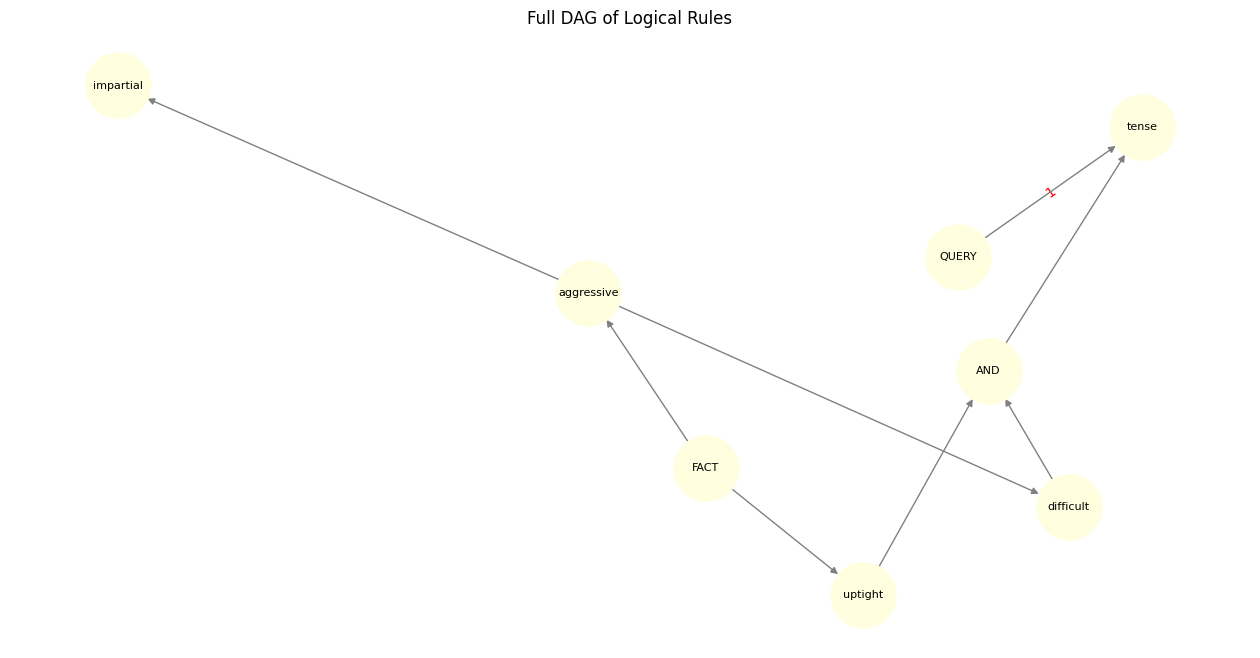

In [18]:
# Initialize the graph
G_full = nx.DiGraph()
and_counter = count(1)  # for unique AND node naming

# Process each rule
for lhs, rhs in vis_statements[:-1]:
    # premises = [p.strip() for p in lhs.split('[AND]')]
    if len(lhs) == 1:
        # Single premise, direct edge
        G_full.add_edge(lhs[0], rhs.strip())
    else:
        # Multiple lhs, add an AND node
        and_node = f"AND{next(and_counter)}"
        for premise in lhs:
            G_full.add_edge(premise, and_node)
        G_full.add_edge(and_node, rhs.strip())

lhs, rhs = vis_statements[-1]
G_full.add_edge(lhs[0], rhs.strip(), label=test_example['label'])

# Draw the full graph
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(G_full, seed=42, k=0.6)
node_labels = {node: node if not node.startswith("AND") else "AND" for node in G_full.nodes}

pos = nx.spring_layout(G_full, seed=42)

edge_labels = nx.get_edge_attributes(G_full, 'label')
nx.draw_networkx_edge_labels(G_full, pos, edge_labels=edge_labels, font_color='red')

nx.draw(G_full, pos, with_labels=True, labels=node_labels, node_color="lightyellow", node_size=2200, font_size=8, edge_color='gray', arrows=True)
plt.title("Full DAG of Logical Rules")
plt.axis('off')
plt.show()

#### Dataset based example

In [ ]:
examples = process_text(file_contents)

In [9]:
examples[6]

{'text': 'aggressive [IMPLY] difficult [PERIOD] difficult [AND] uptight [IMPLY] tense [PERIOD] impartial [AND] tense [AND] plain [IMPLY] embarrassed [PERIOD] aggressive [IMPLY] impartial [PERIOD] embarrassed [AND] tense [IMPLY] uptight [PERIOD] tense [IMPLY] difficult [PERIOD] aggressive [AND] tense [IMPLY] uptight [PERIOD] strange [AND] difficult [IMPLY] aggressive [PERIOD] aggressive [AND] plain [AND] difficult [IMPLY] strange [PERIOD] strange [IMPLY] uptight [PERIOD] impartial [IMPLY] difficult [PERIOD] impartial [IMPLY] embarrassed [PERIOD] strange [IMPLY] aggressive [PERIOD] embarrassed [AND] plain [AND] difficult [IMPLY] aggressive [PERIOD] plain [AND] strange [AND] aggressive [IMPLY] impartial [PERIOD] alice embarrassed [PERIOD] query : alice is strange [PERIOD]',
 'label': 1}

In [6]:
i = 30
print(examples[i])

{'text': 'vivacious [AND] witty [IMPLY] mean [PERIOD] strange [AND] gorgeous [IMPLY] sensible [PERIOD] gorgeous [AND] combative [IMPLY] mean [PERIOD] vivacious [AND] pessimistic [AND] average [IMPLY] sensible [PERIOD] pessimistic [AND] average [AND] lucky [IMPLY] strange [PERIOD] average [AND] busy [IMPLY] mean [PERIOD] combative [IMPLY] average [PERIOD] combative [IMPLY] mean [PERIOD] busy [AND] pessimistic [IMPLY] mean [PERIOD] perfect [AND] witty [IMPLY] bossy [PERIOD] mean [IMPLY] combative [PERIOD] bossy [AND] mean [IMPLY] combative [PERIOD] alice lucky [PERIOD] alice gorgeous [PERIOD] alice strange [PERIOD] alice mean [PERIOD] alice pessimistic [PERIOD] alice combative [PERIOD] query : alice is bossy [PERIOD]', 'label': 1}


In [7]:
temp_text = examples[i]['text']
split_text = temp_text.split(r'[PERIOD]')[:-1]

In [11]:
print(temp_text)

vivacious [AND] witty [IMPLY] mean [PERIOD] strange [AND] gorgeous [IMPLY] sensible [PERIOD] gorgeous [AND] combative [IMPLY] mean [PERIOD] vivacious [AND] pessimistic [AND] average [IMPLY] sensible [PERIOD] pessimistic [AND] average [AND] lucky [IMPLY] strange [PERIOD] average [AND] busy [IMPLY] mean [PERIOD] combative [IMPLY] average [PERIOD] combative [IMPLY] mean [PERIOD] busy [AND] pessimistic [IMPLY] mean [PERIOD] perfect [AND] witty [IMPLY] bossy [PERIOD] mean [IMPLY] combative [PERIOD] bossy [AND] mean [IMPLY] combative [PERIOD] alice lucky [PERIOD] alice gorgeous [PERIOD] alice strange [PERIOD] alice mean [PERIOD] alice pessimistic [PERIOD] alice combative [PERIOD] query : alice is bossy [PERIOD]


In [12]:
rules = list()
facts = list()
queries = list()

for statement in split_text:
    if '[IMPLY]' in statement:
        rules.append(statement)
    elif 'query' in statement:
        queries.append(statement)
    else:
        facts.append(statement)

In [13]:
print(rules)
print(facts)
print(queries)

['vivacious [AND] witty [IMPLY] mean ', ' strange [AND] gorgeous [IMPLY] sensible ', ' gorgeous [AND] combative [IMPLY] mean ', ' vivacious [AND] pessimistic [AND] average [IMPLY] sensible ', ' pessimistic [AND] average [AND] lucky [IMPLY] strange ', ' average [AND] busy [IMPLY] mean ', ' combative [IMPLY] average ', ' combative [IMPLY] mean ', ' busy [AND] pessimistic [IMPLY] mean ', ' perfect [AND] witty [IMPLY] bossy ', ' mean [IMPLY] combative ', ' bossy [AND] mean [IMPLY] combative ']
[' alice lucky ', ' alice gorgeous ', ' alice strange ', ' alice mean ', ' alice pessimistic ', ' alice combative ']
[' query : alice is bossy ']


In [14]:
list_rules = []
for rule in rules:
    if '[AND]' in rule:
        premise = rule.split(' [IMPLY] ')[0].split(' [AND] ')
        conclusion = rule.split(' [IMPLY] ')[1].strip()    
    else:
        premise = [rule.split(' [IMPLY] ')[0]]
        conclusion = rule.split(' [IMPLY] ')[1].strip()
    premise = [p.strip() for p in premise]
    list_rules.append((premise, conclusion))

list_facts = [fact.split()[1] for fact in facts] 

list_queries = [query.split()[-1] for query in queries]


In [15]:
print(list_rules)
print(list_facts)
print(list_queries)

[(['vivacious', 'witty'], 'mean'), (['strange', 'gorgeous'], 'sensible'), (['gorgeous', 'combative'], 'mean'), (['vivacious', 'pessimistic', 'average'], 'sensible'), (['pessimistic', 'average', 'lucky'], 'strange'), (['average', 'busy'], 'mean'), (['combative'], 'average'), (['combative'], 'mean'), (['busy', 'pessimistic'], 'mean'), (['perfect', 'witty'], 'bossy'), (['mean'], 'combative'), (['bossy', 'mean'], 'combative')]
['lucky', 'gorgeous', 'strange', 'mean', 'pessimistic', 'combative']
['bossy']


In [16]:
tokens = temp_text.split()
nodes = list(set(tokens) - {':', 'is', '[IMPLY]', '[PERIOD]', '[AND]', 'query', 'alice'})
print(nodes)
# Assigning index to each token, for building adjacecny matrix
idx = dict()
for i, node in enumerate(nodes):
    idx[node] = i
idx['AND'] = len(nodes)
idx['QUERY'] = len(nodes) + 1
idx['FACT'] = len(nodes) + 2
print(idx)

['busy', 'lucky', 'sensible', 'gorgeous', 'vivacious', 'pessimistic', 'combative', 'strange', 'mean', 'bossy', 'perfect', 'witty', 'average']
{'busy': 0, 'lucky': 1, 'sensible': 2, 'gorgeous': 3, 'vivacious': 4, 'pessimistic': 5, 'combative': 6, 'strange': 7, 'mean': 8, 'bossy': 9, 'perfect': 10, 'witty': 11, 'average': 12, 'AND': 13, 'QUERY': 14, 'FACT': 15}


In [19]:
len_r, len_f,  len_q = len(list_rules), len(list_facts), len(list_queries)
adj_matrix = np.zeros((len_r + 1 + len_q, len(nodes)+3, len(nodes)+3)) # 1 for facts, all facts can be store in one 2D array

# rules
for i in range(len_r):

    premise, conclusion = list_rules[i] 

    if len(premise) == 1:
        adj_matrix[i, idx[premise[0]], idx[conclusion]] = 1
    else:
        for p in premise:
            adj_matrix[i, idx[p], idx['AND']] = 1
        adj_matrix[i, idx['AND'], idx[conclusion]] = 1

# facts
for i in range(len_f):
    fact = list_facts[i]
    adj_matrix[len_r, idx['FACT'], idx[fact]] = 1

# queries
for i in range(len_q):
    query = list_queries[i]
    adj_matrix[len_r + 1 + i, idx['QUERY'], idx[query]] = 1

In [ ]:
def build_adjacency_matrix(text: str):

    split_text = text.split(r'[PERIOD]')[:-1]

    rules = list()
    facts = list()
    queries = list()

    for statement in split_text:
        if '[IMPLY]' in statement:
            rules.append(statement)
        elif 'query' in statement:
            queries.append(statement)
        else:
            facts.append(statement)

    list_rules = []
    for rule in rules:
        if '[AND]' in rule:
            premise = rule.split(' [IMPLY] ')[0].split(' [AND] ')
            conclusion = rule.split(' [IMPLY] ')[1].strip()    
        else:
            premise = [rule.split(' [IMPLY] ')[0]]
            conclusion = rule.split(' [IMPLY] ')[1].strip()
        premise = [p.strip() for p in premise]
        list_rules.append((premise, conclusion))

    list_facts = [fact.split()[1] for fact in facts] 

    list_queries = [query.split()[-1] for query in queries]

    tokens = temp_text.split()
    nodes = list(set(tokens) - {':', 'is', '[IMPLY]', '[PERIOD]', '[AND]', 'query', 'alice'})
    print(nodes)
    # Assigning index to each token, for building adjacecny matrix
    idx = dict()
    for i, node in enumerate(nodes):
        idx[node] = i
    idx['AND'] = len(nodes)
    idx['QUERY'] = len(nodes) + 1
    idx['FACT'] = len(nodes) + 2
    print(idx)

    # X [AND] Y [IMPLY] Z is stored as ([X, Y], Z) in rules_list; convenient for building adjacency matrix

    len_r, len_q = len(list_rules), len(list_queries)
    adj_matrix = np.zeros((len_r + 1 + len_q, len(nodes)+3, len(nodes)+3)) # 1 for facts, all facts can be store in one 2D array

    # rules
    for i in range(len_r):

        premise, conclusion = list_rules[i] 

        if len(premise) == 1:
            adjacency_matrix[i, idx[premise[0]], idx[conclusion]] = 1
        else:
            for p in premise:
                adjacency_matrix[i, idx[p], idx['AND']] = 1
            adjacency_matrix[i, idx['AND'], idx[conclusion]] = 1

    # facts
    for i in range(len_f):
        fact = list_facts[i]
        adj_matrix[len_r, idx['FACT'], idx[fact]] = 1

    # queries
    for i in range(len_q):
        query = list_queries[i]
        adj_matrix[len_r + 1 + i, idx['QUERY'], idx[query]] = 1

    return rules_list, adjacency_matrix

In [20]:
vis_statements = list_rules + [(['FACT'], fact) for fact in list_facts] + [(['QUERY'], query) for query in list_queries]
print(vis_statements)

[(['vivacious', 'witty'], 'mean'), (['strange', 'gorgeous'], 'sensible'), (['gorgeous', 'combative'], 'mean'), (['vivacious', 'pessimistic', 'average'], 'sensible'), (['pessimistic', 'average', 'lucky'], 'strange'), (['average', 'busy'], 'mean'), (['combative'], 'average'), (['combative'], 'mean'), (['busy', 'pessimistic'], 'mean'), (['perfect', 'witty'], 'bossy'), (['mean'], 'combative'), (['bossy', 'mean'], 'combative'), (['FACT'], 'lucky'), (['FACT'], 'gorgeous'), (['FACT'], 'strange'), (['FACT'], 'mean'), (['FACT'], 'pessimistic'), (['FACT'], 'combative'), (['QUERY'], 'bossy')]


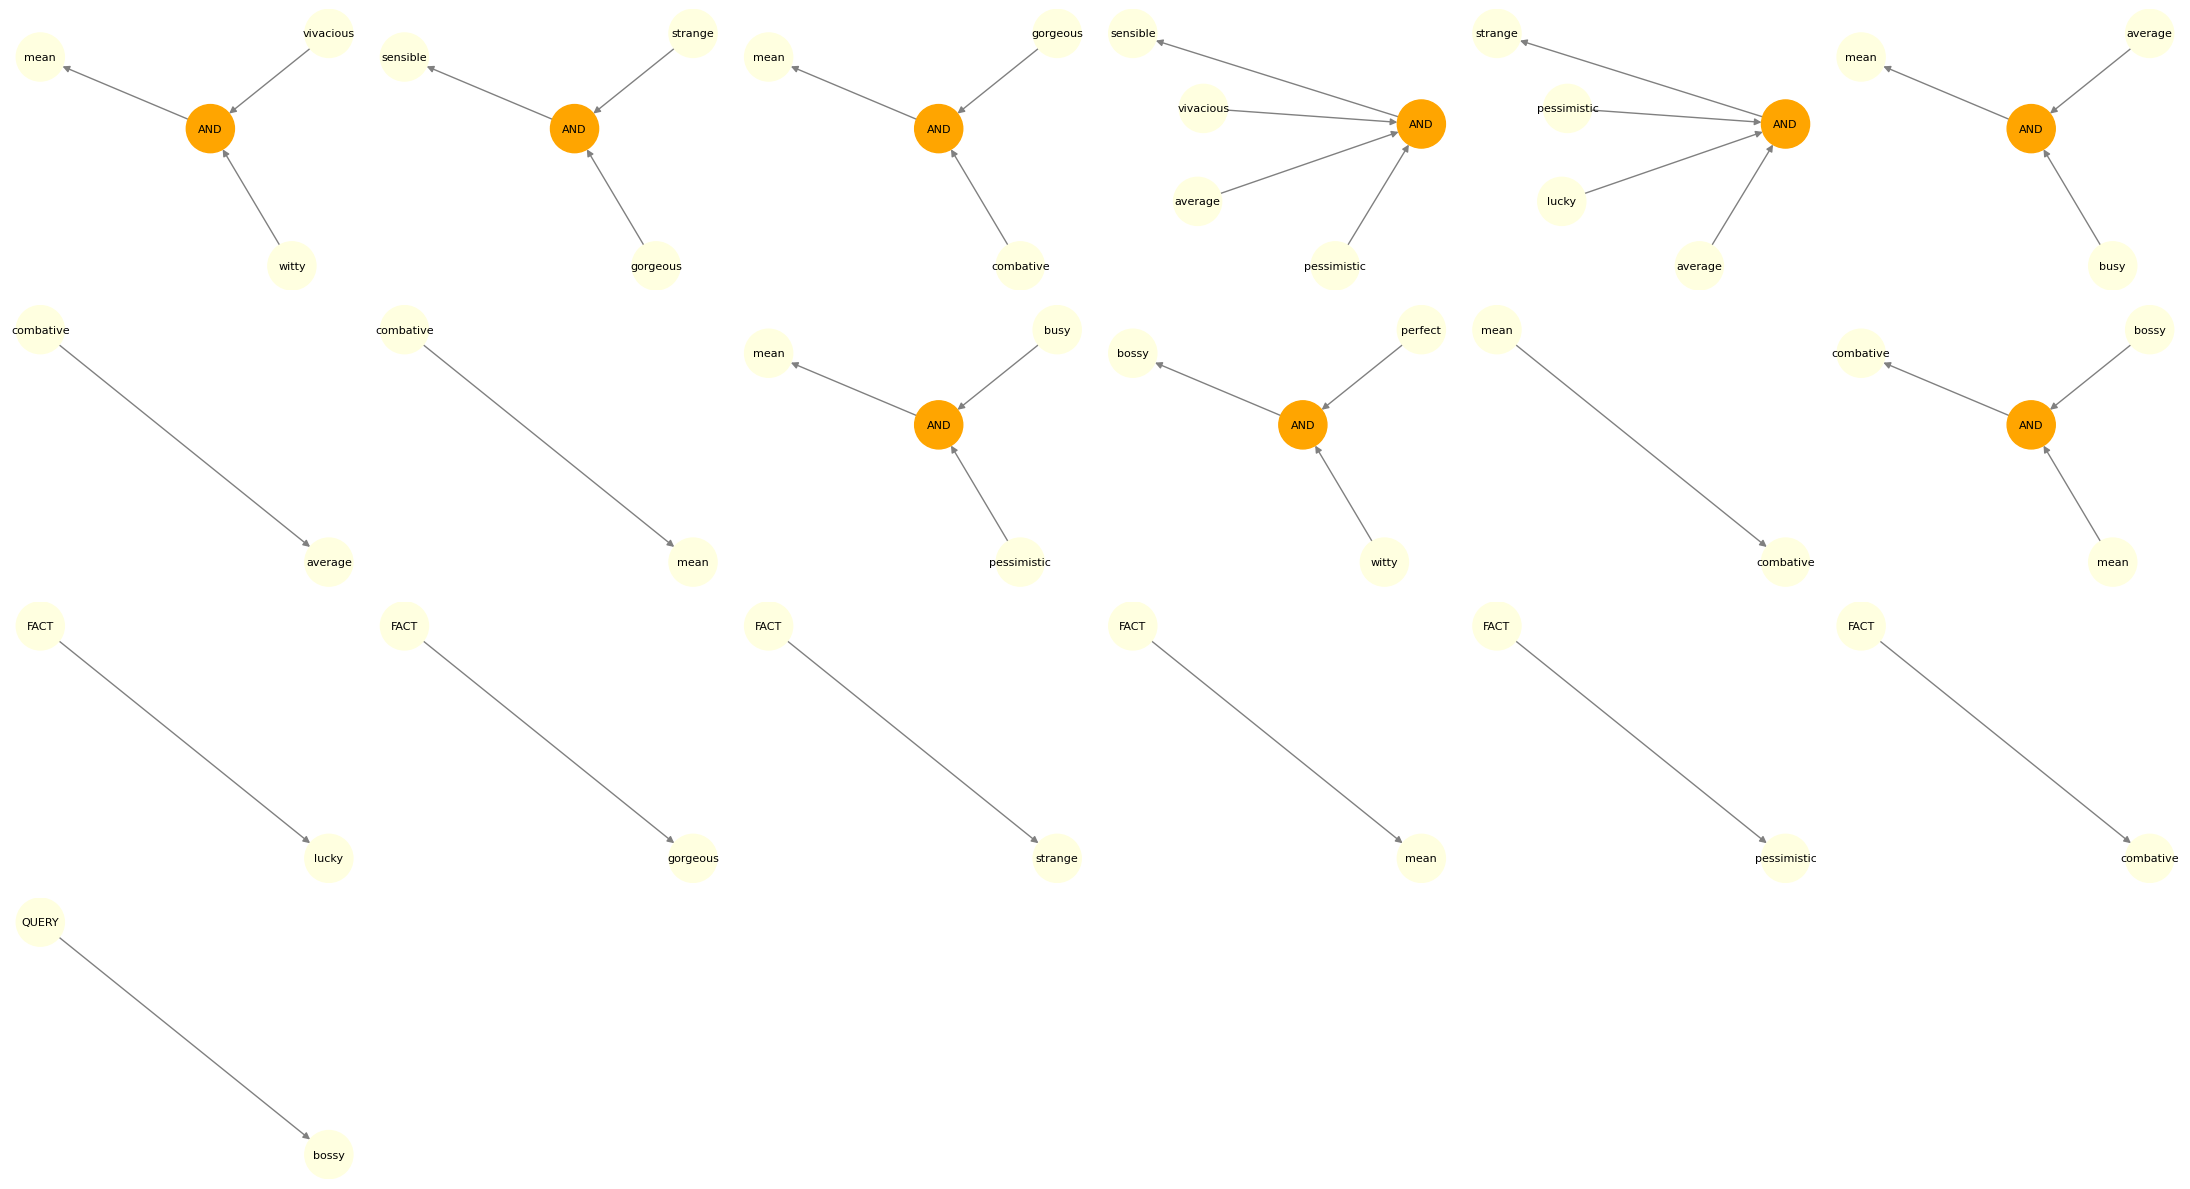

In [21]:
subgraphs = []
and_counter = count(1)

# Create separate subgraphs per rule
for lhs, rhs in vis_statements:
    G_rule = nx.DiGraph()
    rhs = rhs.strip()
    
    if len(lhs) == 1:
        G_rule.add_edge(lhs[0], rhs)
    else:
        and_node = f"AND{next(and_counter)}"
        for premise in lhs:
            G_rule.add_edge(premise, and_node)
        G_rule.add_edge(and_node, rhs)
    
    subgraphs.append(G_rule)

# Plot all rule DAGs in one plot using subplots
n = len(subgraphs)
cols = 6
rows = n // cols + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(22, rows * 3))
axes = axes.flatten()

for i, G in enumerate(subgraphs):
    pos = nx.spring_layout(G, seed=42)
    node_labels = {node: node if not node.startswith("AND") else "AND" for node in G.nodes}
    node_colors = ["lightyellow" if not node.startswith("AND") else "orange" for node in G.nodes]

    nx.draw(
        G, pos, ax=axes[i], with_labels=True,
        labels=node_labels, node_color=node_colors,
        node_size=1200, font_size=8, edge_color='gray', arrows=True
    )
    # axes[i].set_title(f"Rule {i+1}", fontsize=9)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [45]:
rules_list, adjacency_matrix = build_adjacency_matrix(examples[0]["text"])

In [46]:
print(adjacency_matrix.shape, len(rules_list))

(42, 18, 18) 42


In [48]:
print(rules_list)

[(['homely'], 'spotless'), (['impartial', 'helpless', 'uptight'], 'spotless'), (['uptight', 'impartial'], 'versatile'), (['glamorous', 'versatile', 'scared'], 'uptight'), (['spotless'], 'glamorous'), (['helpless', 'joyous', 'scared'], 'clumsy'), (['scared'], 'excited'), (['clumsy', 'homely', 'impartial'], 'excited'), (['helpful'], 'versatile'), (['glamorous'], 'excited'), (['scared', 'helpful', 'impartial'], 'nervous'), (['clumsy', 'excited', 'helpful'], 'zealous'), (['uptight', 'homely'], 'helpful'), (['versatile', 'glamorous'], 'long'), (['uptight'], 'long'), (['long', 'zealous', 'joyous'], 'excited'), (['glamorous'], 'uptight'), (['zealous', 'versatile', 'long'], 'impartial'), (['versatile', 'joyous'], 'spotless'), (['joyous', 'uptight', 'glamorous'], 'long'), (['zealous'], 'helpful'), (['scared', 'homely', 'zealous'], 'nervous'), (['homely', 'clumsy', 'joyous'], 'nervous'), (['long', 'glamorous', 'spotless'], 'helpful'), (['long', 'impartial', 'helpful'], 'clumsy'), (['impartial', 

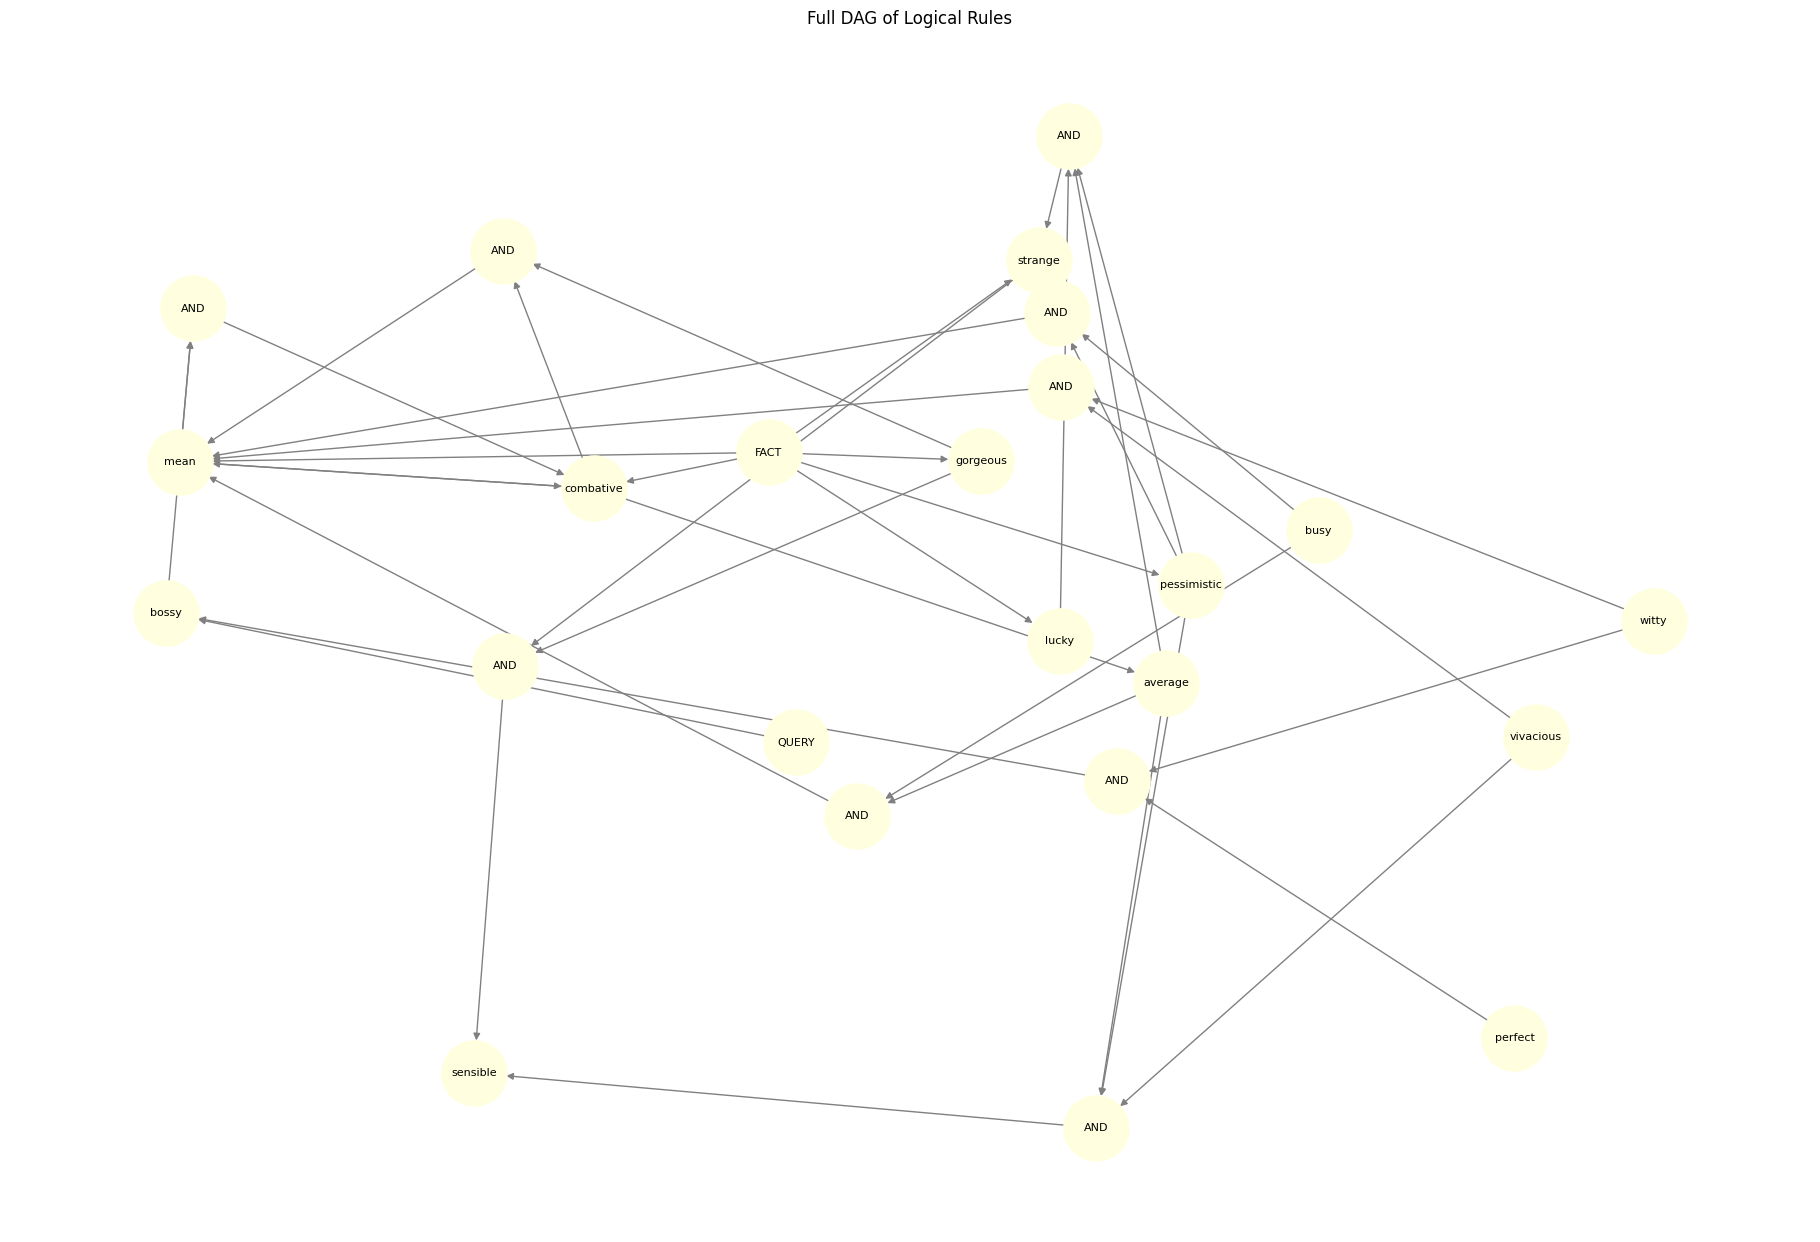

In [ ]:
# Initialize the graph
G_rules = nx.DiGraph()
and_counter = count(1)  # for unique AND node naming

# Process each rule
for lhs, rhs in vis_statements:
    # premises = [p.strip() for p in lhs.split('[AND]')]
    if len(lhs) == 1:
        # Single premise, direct edge
        G_full.add_edge(lhs[0], rhs.strip())
    else:
        # Multiple lhs, add an AND node
        and_node = f"AND{next(and_counter)}"
        for premise in lhs:
            G_full.add_edge(premise, and_node)
        G_full.add_edge(and_node, rhs.strip())

# Draw the full graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G_full, seed=42, k=0.6)
node_labels = {node: node if not node.startswith("AND") else "AND" for node in G_full.nodes}

nx.draw(G_full, pos, with_labels=True, labels=node_labels, node_color="lightyellow", node_size=2200, font_size=8, edge_color='gray', arrows=True)
plt.title("Full DAG of Logical Rules")
plt.axis('off')
plt.show()
